In [1]:
print("hello ratikant patil u r a good english speaker")

hello ratikant patil u r a good english speaker


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data Ingestion

df = pd.read_csv('.\data\gemstone.csv')

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df_copy = df.copy()

In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
df.drop(labels=['id'], axis = 1, inplace=True)

In [10]:
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [11]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [12]:
df.dtypes[df.dtypes == 'object']

cut        object
color      object
clarity    object
dtype: object

In [13]:
#Getting Columns Name 

categorical_columns = df.dtypes[df.dtypes == 'object'].index

In [14]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [15]:
#Getting Numerical Columns

numerical_columns = df.dtypes[df.dtypes != 'object'].index

In [16]:
#printing Numerical Columns

numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [17]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [18]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [19]:
df.size

1935730

In [20]:
#getting a data from dataset from orignal data set sample data if you want to get less data you can it for that write a sample fuction means use it 

# df.sample(100000)

# we can take in percentage like fraction .... for example df.sample(frack=.20) this give you only 2 lact rows

In [21]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

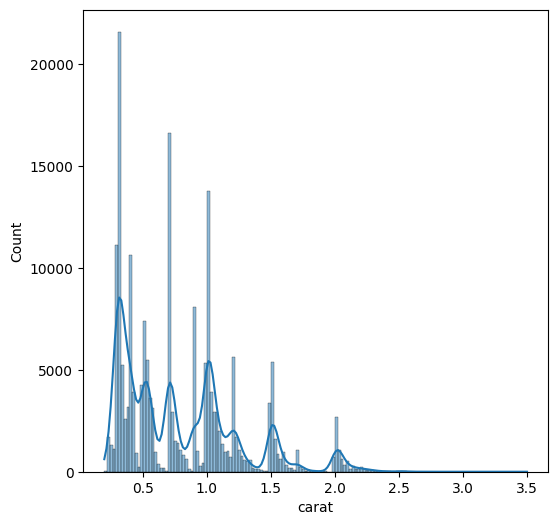

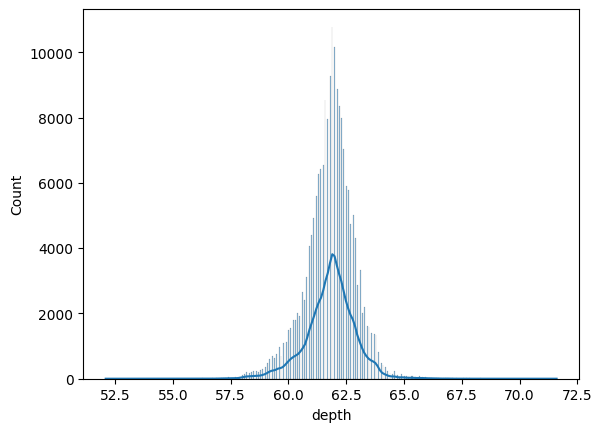

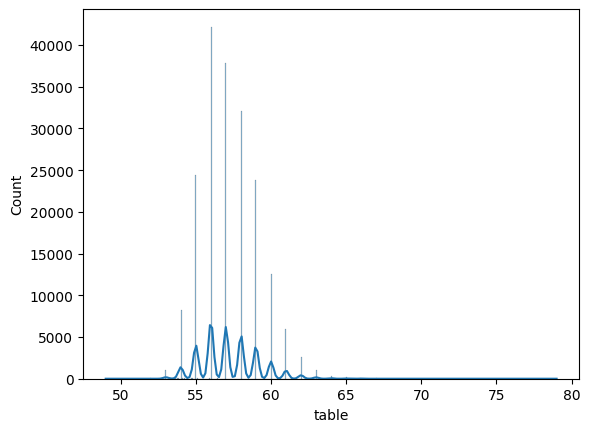

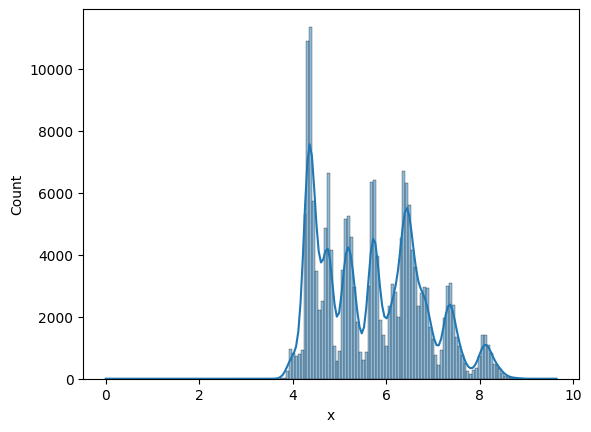

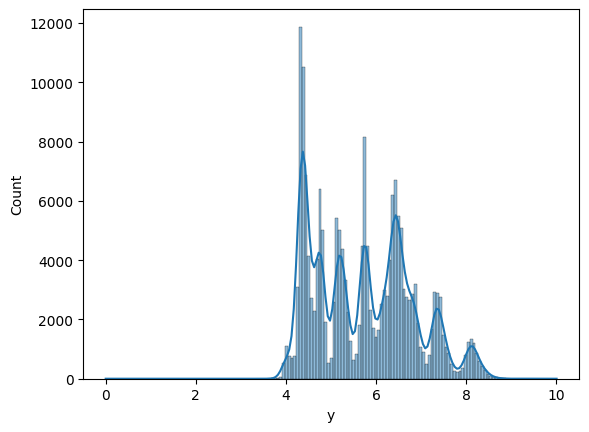

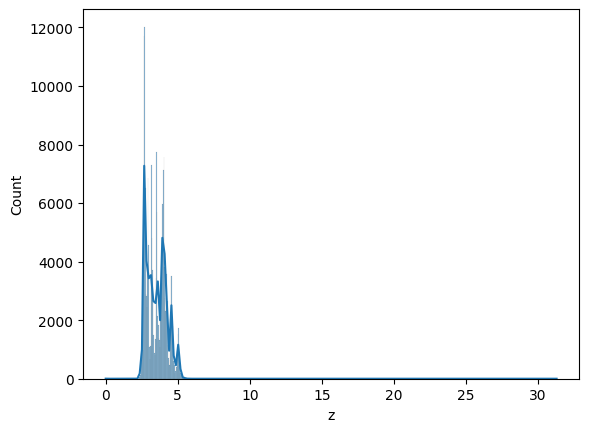

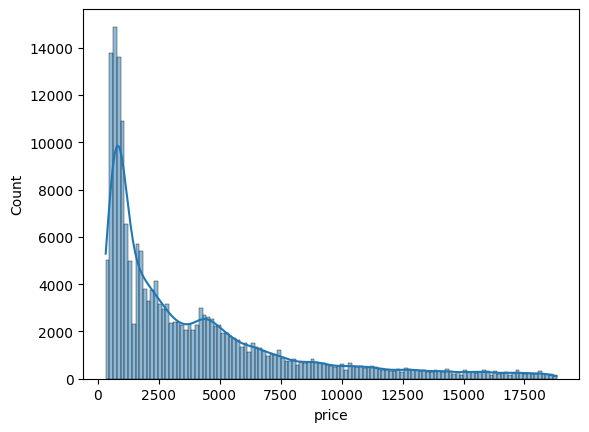

In [22]:
plt.figure(figsize=(6,6))
x = 0
for i in numerical_columns:
  sns.histplot(data = df , x = i , kde = True)
  print('\n')
  plt.show()

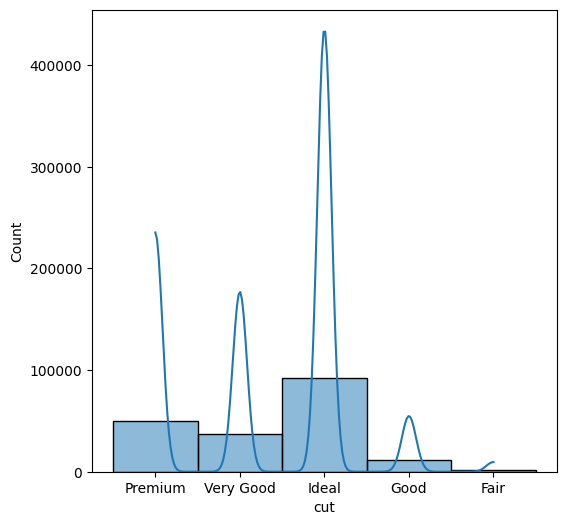

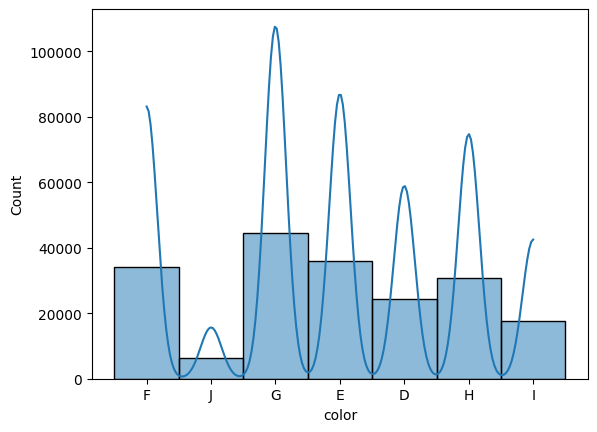

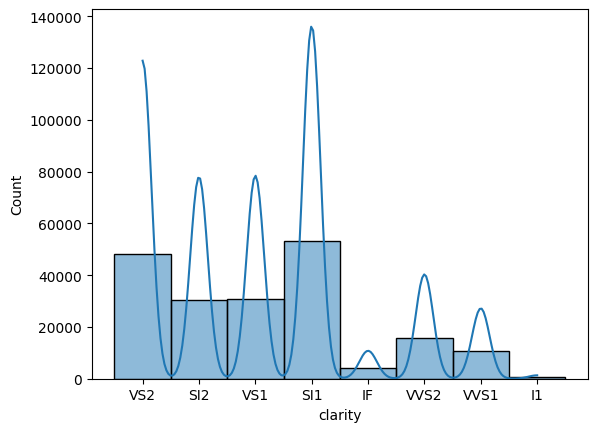

In [23]:
plt.figure(figsize= ( 6,6))
x = 0
for i in categorical_columns :
  sns.histplot(data = df, x = i , kde = True)
  print('\n')
  plt.show()

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [25]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())


['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
['F' 'J' 'G' 'E' 'D' 'H' 'I']
['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [26]:
# Your mappings (starting from 1, as you wanted)
cut_mapping = {
    'Fair': 5,
    'Good': 4,
    'Very Good': 3,
    'Premium': 2,
    'Ideal': 1
}

color_mapping = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7
}

clarity_mapping = {
    'I1': 8,
    'SI2': 7,
    'SI1': 6,
    'VS2': 5,
    'VS1': 4,
    'VVS2': 3,
    'VVS1': 2,
    'IF': 1
}

# Clean data to remove any extra spaces (just in case)
df['cut'] = df['cut'].str.strip()
df['color'] = df['color'].str.strip()
df['clarity'] = df['clarity'].str.strip()

# Map the categorical columns to numeric, replacing original values
df['cut'] = df['cut'].map(cut_mapping)
df['color'] = df['color'].map(color_mapping)
df['clarity'] = df['clarity'].map(clarity_mapping)

# Now the original dataframe columns are changed in-place
print(df.head())


   carat  cut  color  clarity  depth  table     x     y     z  price
0   1.52    2      3        5   62.2   58.0  7.27  7.33  4.55  13619
1   2.03    3      7        7   62.0   58.0  8.06  8.12  5.05  13387
2   0.70    1      4        4   61.2   57.0  5.69  5.73  3.50   2772
3   0.32    1      4        4   61.6   56.0  4.38  4.41  2.71    666
4   1.70    2      4        5   62.6   59.0  7.65  7.61  4.77  14453


In [27]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.150901,0.292400,0.348611,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
cut,0.150901,1.000000,0.022439,0.185145,0.249720,0.480481,0.146743,0.147164,0.168376,0.090948
color,0.292400,0.022439,1.000000,-0.088333,0.035517,0.034978,0.269394,0.269509,0.270132,0.210859
clarity,0.348611,0.185145,-0.088333,1.000000,0.060720,0.184567,0.375424,0.373709,0.376404,0.184439
depth,0.027852,0.249720,0.035517,0.060720,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,0.480481,0.034978,0.184567,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,0.146743,0.269394,0.375424,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,0.147164,0.269509,0.373709,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.168376,0.270132,0.376404,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.090948,0.210859,0.184439,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

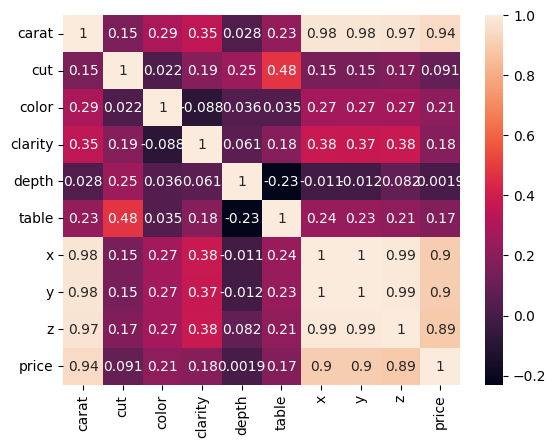

In [28]:
sns.heatmap(df.corr(), annot = True)
